In [108]:
import pandas as pd
import numpy as np

In [109]:
df = pd.read_csv('../resources/processed/v4/train_20241104_filtering.csv')
df_candi = pd.read_csv('../resources/processed/for_merge/generated_titles_sum.csv', index_col=0)

In [110]:
df

,index,ID,text,target,target_name,source,similarity
0,0,ynat-v1_train_00000,"정부, '주파수 미사용' KT에 이용기간 2년 단축 처분(종합2보)",4,IT과학,noisy,0.20060
1,1,ynat-v1_train_00000,"정부, KT 주파수 미사용에 강력한 제재 조치",4,IT과학,noisy,0.22637
2,2,ynat-v1_train_00000,"KT, 주파수 미사용으로 이용기간 2년 단축 처분",4,IT과학,noisy,0.20635
3,3,ynat-v1_train_00000,정 파 미사 KT 이용기간 단 분종 보,4,IT과학,noisy,0.18595
4,4,ynat-v1_train_00000,"KT, 주파수 미사용으로 인한 사용 기간의 2년 단축.",4,IT과학,noisy,0.21905
...,...,...,...,...,...,...,...
9588,11608,ynat-v1_train_02797,"텔레그램 등 암호화 메신저, 아시아서 2시간 다운...사용자 혼란",4,IT과학,noisy,0.21980
9589,11609,ynat-v1_train_02797,C 버전을 업데이트한 후 텔레그램과 같은 메신저가 2시간 동안 다운되었는데 원인은 ...,4,IT과학,noisy,0.22245
9590,11610,ynat-v1_train_02797,텔레그램 및 기타 암호화 메신저는 아시아에서 2시간 동안 다운되었습니다... 사용자 혼란,4,IT과학,noisy,0.21626
9591,11612,ynat-v1_train_02798,인터뷰 류현진 친구에게 안타 맞는 것 싫어해 승부는 냉정,1,스포츠,not_noisy,0.20228


In [111]:
df_candi = df_candi.reset_index()

In [112]:
label_encodeing_dic = {'생활문화': 0, '스포츠': 1, '정치': 2, '사회': 3, 'IT과학': 4, '경제': 5, '세계': 6}
label_decoding_dic = {v:k for k, v in label_encodeing_dic.items()}

In [113]:
df_candi['ID'] = [str(x) for x in df_candi['index']]
df_candi['index'] = [x for x in range(df['index'].max()+1, df['index'].max()+ len(df_candi)+1)]
df_candi['target_name'] = [label_decoding_dic[x] for x in df_candi['target']]
df_candi['source'] = 'gemma2'
df_candi['similarity'] = 0

In [114]:
df_f = pd.concat([df, df_candi])

In [115]:
df_f = df_f.reset_index(drop=True)

In [116]:
df_f = df_f.rename(columns={'index': 'before_index'})

In [117]:
df_f

,before_index,ID,text,target,target_name,source,similarity
0,0,ynat-v1_train_00000,"정부, '주파수 미사용' KT에 이용기간 2년 단축 처분(종합2보)",4,IT과학,noisy,0.20060
1,1,ynat-v1_train_00000,"정부, KT 주파수 미사용에 강력한 제재 조치",4,IT과학,noisy,0.22637
2,2,ynat-v1_train_00000,"KT, 주파수 미사용으로 이용기간 2년 단축 처분",4,IT과학,noisy,0.20635
3,3,ynat-v1_train_00000,정 파 미사 KT 이용기간 단 분종 보,4,IT과학,noisy,0.18595
4,4,ynat-v1_train_00000,"KT, 주파수 미사용으로 인한 사용 기간의 2년 단축.",4,IT과학,noisy,0.21905
...,...,...,...,...,...,...,...
12300,14321,2707,"배구 리그, 선수들의 웅장한 실력과 전략으로 관객을 사로잡다!",1,스포츠,gemma2,0.00000
12301,14322,2708,"한국, 국제 사회에 기여하는 선진국으로서의 역할 강조",6,세계,gemma2,0.00000
12302,14323,2709,"우주 탐사, 새로운 행성 발견 및 은하계 연구 진행",4,IT과학,gemma2,0.00000
12303,14324,2710,사회적 분위기 개선 노력: 정서적 안정 및 공동체 의식 확산,3,사회,gemma2,0.00000


In [86]:
df_f['source'].value_counts()

source
noisy        8584
gemma2       2712
not_noisy    1009
Name: count, dtype: int64

### sentence 임베딩

In [39]:
from sentence_transformers import SentenceTransformer

# Download from the 🤗 Hub
model = SentenceTransformer("dragonkue/bge-m3-ko")

/data/ephemeral/home/ksh/level2-nlp-datacentric-nlp-08/.venv_sh/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [40]:
sentences = df_f['text'].tolist()

In [41]:
len(sentences)

12305

In [42]:
embeddings = model.encode(sentences)
print(embeddings.shape)

(12305, 1024)


In [44]:
np.save('embeddings_gemma.npy', embeddings)

### 임베딩 벡터 불러와서 similarity 계산

In [118]:
embeddings = np.load('embeddings_gemma.npy')

In [119]:
embeddings.shape

(12305, 1024)

In [120]:
df_noisy = df_f[df_f['source'] == 'noisy']

In [126]:
topic_similarity_dic = {}
for _, group in df_noisy.groupby('target'):
    target = group['target'].tolist()[0]
    idx = group.index.tolist()
    embeddings_idx = embeddings[idx]
    target_embedding = np.mean(embeddings_idx, axis=0)
    topic_similarity_dic[target] = target_embedding

In [127]:
sim_result = []
for _, group in df_f.groupby('target'):
    target = group['target'].tolist()[0]
    print(target)
    target_embedding = topic_similarity_dic[target]
    idx = group.index.tolist()
    embedding_lst = embeddings[idx]
    target_similarity = embedding_lst @ target_embedding.T
    print(len(target_similarity))
    print(target_similarity.max())
    print(target_similarity.min())
    for i, s in zip(idx, target_similarity):
        sim_result.append([i, round(float(s), 5)])
    print()
    

0
1737
0.2610103
0.14221977

1
1774
0.3170998
0.17661862

2
1864
0.3225543
0.12865591

3
1749
0.28097853
0.12711938

4
1713
0.35098085
0.15316725

5
1599
0.3338592
0.14414059

6
1869
0.28714705
0.15161514



In [128]:
df_sim = pd.DataFrame(sim_result, columns=['index', 'similarity'])

In [130]:
df_f = df_f.drop('similarity', axis=1)

In [135]:
df_f = df_f.reset_index()

In [136]:
df_f

,index,before_index,ID,text,target,target_name,source
0,0,0,ynat-v1_train_00000,"정부, '주파수 미사용' KT에 이용기간 2년 단축 처분(종합2보)",4,IT과학,noisy
1,1,1,ynat-v1_train_00000,"정부, KT 주파수 미사용에 강력한 제재 조치",4,IT과학,noisy
2,2,2,ynat-v1_train_00000,"KT, 주파수 미사용으로 이용기간 2년 단축 처분",4,IT과학,noisy
3,3,3,ynat-v1_train_00000,정 파 미사 KT 이용기간 단 분종 보,4,IT과학,noisy
4,4,4,ynat-v1_train_00000,"KT, 주파수 미사용으로 인한 사용 기간의 2년 단축.",4,IT과학,noisy
...,...,...,...,...,...,...,...
12300,12300,14321,2707,"배구 리그, 선수들의 웅장한 실력과 전략으로 관객을 사로잡다!",1,스포츠,gemma2
12301,12301,14322,2708,"한국, 국제 사회에 기여하는 선진국으로서의 역할 강조",6,세계,gemma2
12302,12302,14323,2709,"우주 탐사, 새로운 행성 발견 및 은하계 연구 진행",4,IT과학,gemma2
12303,12303,14324,2710,사회적 분위기 개선 노력: 정서적 안정 및 공동체 의식 확산,3,사회,gemma2


In [139]:
df_f = pd.merge(df_f, df_sim, how = 'left', on='index')

In [140]:
df_f

,index,before_index,ID,text,target,target_name,source,similarity
0,0,0,ynat-v1_train_00000,"정부, '주파수 미사용' KT에 이용기간 2년 단축 처분(종합2보)",4,IT과학,noisy,0.20434
1,1,1,ynat-v1_train_00000,"정부, KT 주파수 미사용에 강력한 제재 조치",4,IT과학,noisy,0.23111
2,2,2,ynat-v1_train_00000,"KT, 주파수 미사용으로 이용기간 2년 단축 처분",4,IT과학,noisy,0.21015
3,3,3,ynat-v1_train_00000,정 파 미사 KT 이용기간 단 분종 보,4,IT과학,noisy,0.18661
4,4,4,ynat-v1_train_00000,"KT, 주파수 미사용으로 인한 사용 기간의 2년 단축.",4,IT과학,noisy,0.22279
...,...,...,...,...,...,...,...,...
12300,12300,14321,2707,"배구 리그, 선수들의 웅장한 실력과 전략으로 관객을 사로잡다!",1,스포츠,gemma2,0.27091
12301,12301,14322,2708,"한국, 국제 사회에 기여하는 선진국으로서의 역할 강조",6,세계,gemma2,0.17455
12302,12302,14323,2709,"우주 탐사, 새로운 행성 발견 및 은하계 연구 진행",4,IT과학,gemma2,0.20645
12303,12303,14324,2710,사회적 분위기 개선 노력: 정서적 안정 및 공동체 의식 확산,3,사회,gemma2,0.18521


### 히스토그램 및 이상치 확인하여 제거

In [155]:
import matplotlib.pyplot as plt

def find_outliers(data, target_name=None):
    # 리스트를 NumPy 배열로 변환
    arr = np.array(data)
    
    # 사분위수 계산
    Q1 = np.percentile(arr, 25)
    Q3 = np.percentile(arr, 75)
    
    # IQR 계산
    IQR = Q3 - Q1
    
    # 상한과 하한 경계 계산
    # if target_name == '경제':
    lower_bound = Q1 - 0.5 * IQR
    upper_bound = Q3 + 0.5 * IQR
    # else:
        # lower_bound = Q1 - 0.5 * IQR
        # upper_bound = Q3 + 1 * IQR
    
    
    # 이상치 찾기
    outliers = arr[(arr < lower_bound) | (arr > upper_bound)]
    
    return lower_bound, upper_bound, outliers

생활문화
0.170615 0.220235
138 ['애스턴마틴, 한국서 첫 4P 모델 500대 생산 돌입', '국내에서 제작된 최초의 4도어 스포츠카 500대 아스턴 마틴이다.', '2023년 수능, 전국적으로 안정적인 진행... 학생들의 건강과 안전이 최우선입니다.', '날씨-미세먼지 보통 수준 유지...오후부터 나쁨 지역 확대 12일', '미세먼지 보통 수준 유지...오후부터 다시 악화, 곳곳서 주의 필요', '한국 3명이 일본의 연극에 출연', '년 전 일본 건너간 조선 첫 여성도공 백파선', 'SPT 기둥 사고, 안전 조치에 대한 시간당 임금', '산업현장 안전 문제와 재발 방지를 위한 대책에 대한 논의가 필요하다.', '서울 지하철 9호선 탈차사고로 4명이 다쳤다.', '국립민속박물관 아카이브 만들기 특별전 개최', '정부, 무형문화유산 보호 위해 0비 구역 4.4km 확대 개발', '연천과 영해에서는 섭씨 9.1도까지 떨어지는 등 북쪽 지역의 추위를 조심하세요.', '연천, 영하 9.1도 기록...북부 지역 한파 경보 발령', '기소식 8부 장관 내무 6일 화재 대책 발표', '리 에겐 인격적 소 력 중요 과만중 독불 군형은', '리희찬에겐 인격적 소양 중요...정치과학자들과 대화 중', '개인적인 자질을 강조하는 RIJ, 사형에 대한 P와 유일하게 KA.', '광공사 페루 여성 무장도 로 인해 지역 불안', '페루 여성, 국제 광업 대회에서의 눈에 띄는 성과', '페루 여성 운동선수, 광공사 대회서 우승', '충북 한여름 무더위 날씨는 맑음', '작년 우리나라 낙뢰 월에만 만번 벼락 맞을 확률은', '조시아가 쓴 독립선언서의 분배 섹션 편집.', '임동원, 김순권, 박예환 육군총장이 유엔 안전보장이사회에 선임된다.', '서울시립미술관서 추상화가 한묵 첫 유고전 개막', '한강에서 발견된 희귀 어종, 생태계 연구에 새로운 장 열다', '공상 과학 작가 스타니슬라우 렘의 시스템 사고에 대한 소개 텍스트.', '비자나무는 모기퇴치제 옛 문헌 속 생물활용

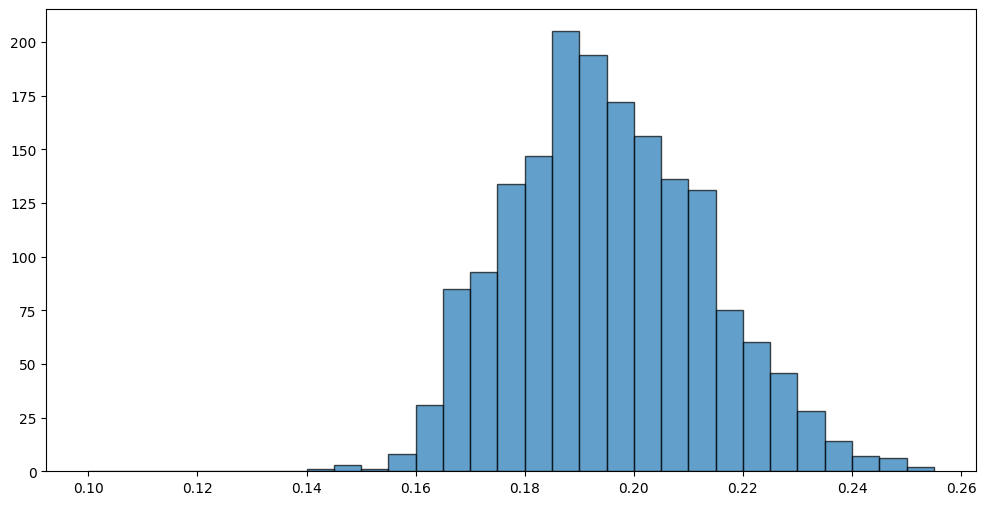

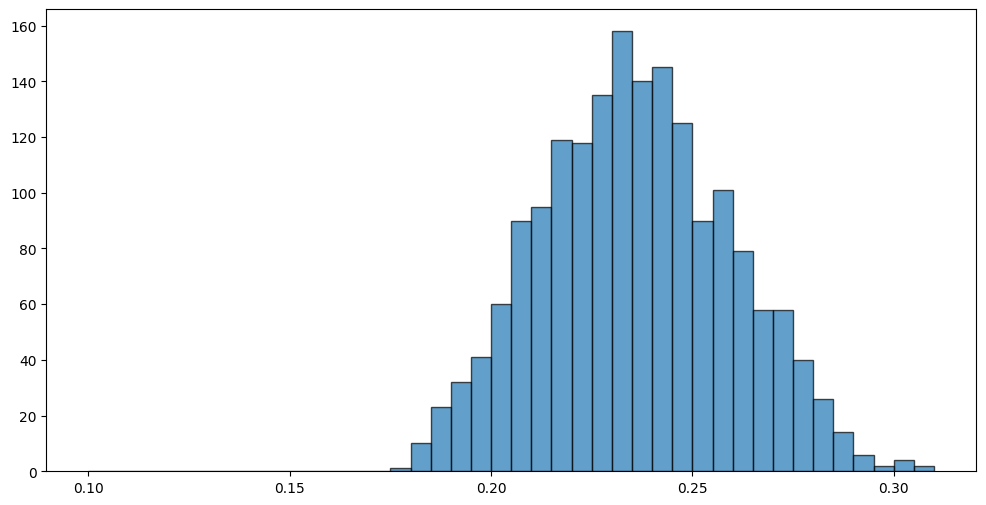

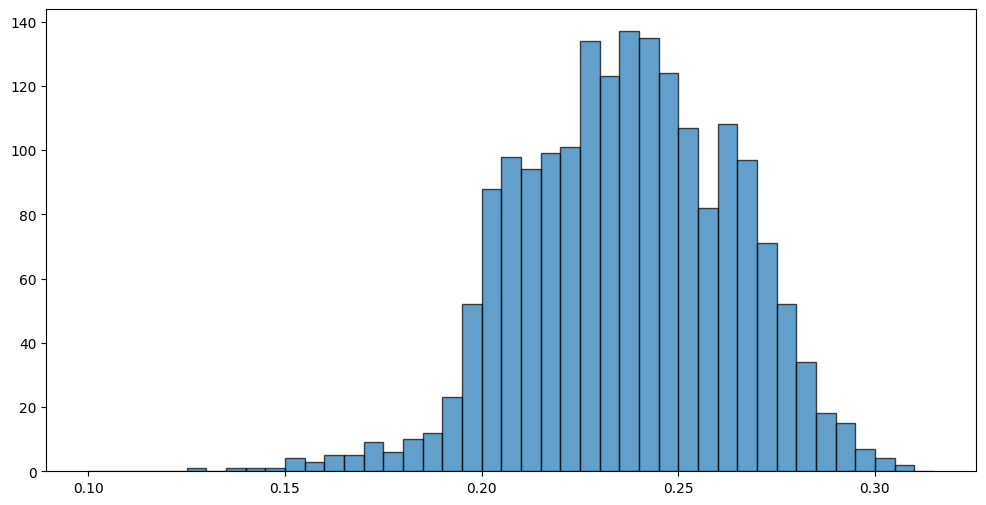

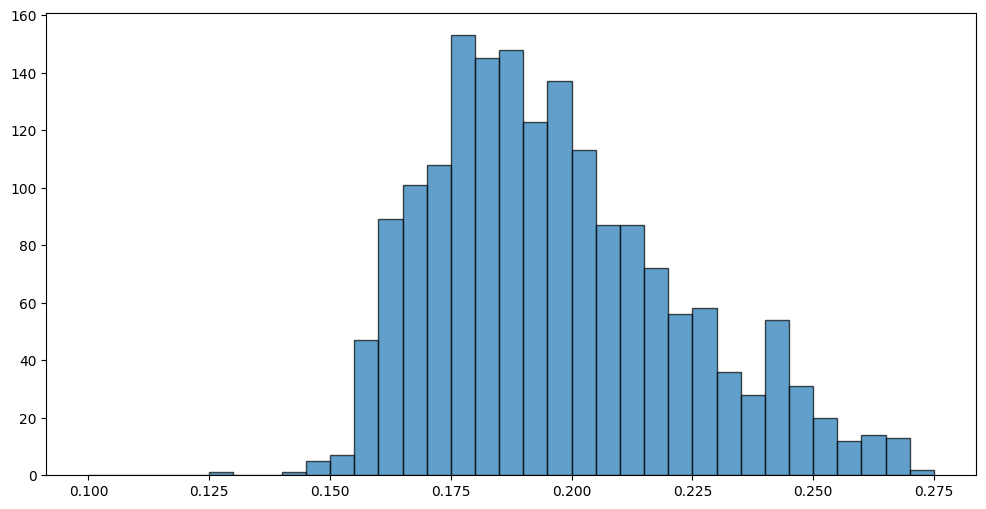

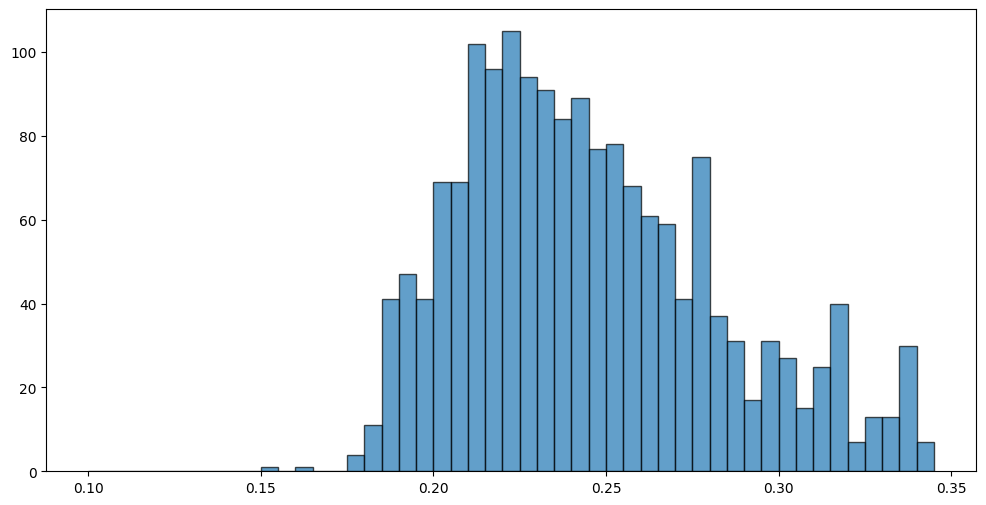

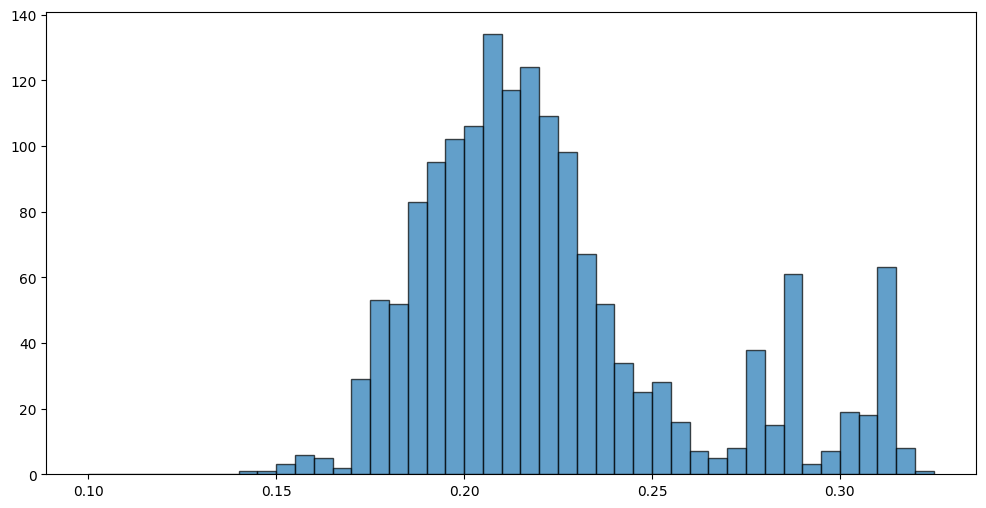

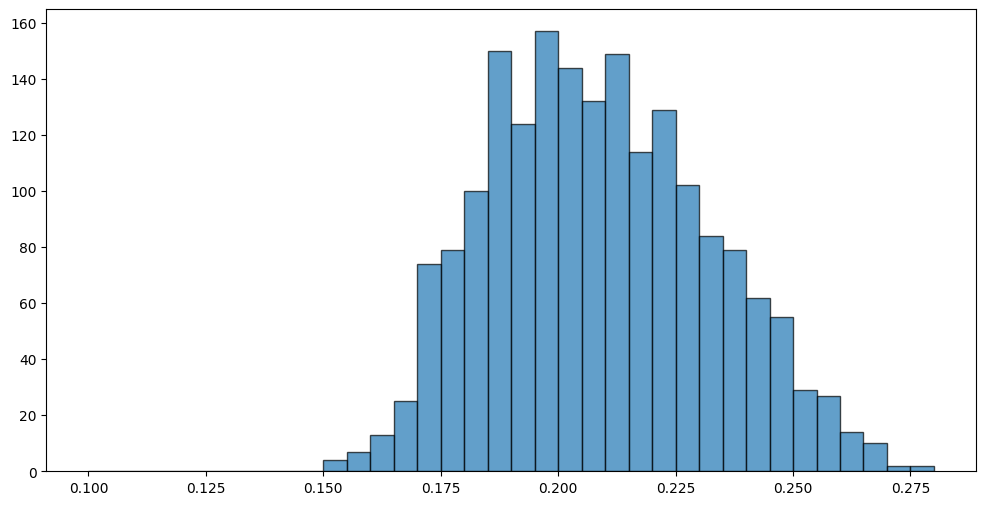

In [157]:
remove_idx = []
for _, group in df_f.groupby('target'):
    target_name = group['target_name'].tolist()[0]
    print(target_name)
    sim_lst = group['similarity'].tolist()
    lower_bound, upper_bound, outliers = find_outliers(sim_lst, target_name)
    print(lower_bound, upper_bound)
    lower_text_lst = group[group['similarity'] <= lower_bound]['text'].tolist()
    lower_idx_lst = group[group['similarity'] <= lower_bound].index.tolist()
    remove_idx.extend(lower_idx_lst)
    print(len(lower_text_lst), lower_text_lst)
    upper_text_lst = group[group['similarity'] >= upper_bound]['text'].tolist()
    upper_idx_lst = group[group['similarity'] >= upper_bound].index.tolist()
    upper_idx_lst_remove = np.random.choice(group.index, size=max(int(len(upper_idx_lst) * 0.95), 1) , replace=False)
    remove_idx.extend(upper_idx_lst_remove)
    print(len(upper_text_lst), upper_text_lst)
    bins = np.arange(0.10, max(sim_lst), 0.005)
    plt.figure(figsize=(12, 6))
    plt.hist(sim_lst, bins=bins[:-1], edgecolor='black', alpha=0.7)
    print()
    

In [158]:
len(remove_idx)

1982

In [159]:
df_f

,index,before_index,ID,text,target,target_name,source,similarity
0,0,0,ynat-v1_train_00000,"정부, '주파수 미사용' KT에 이용기간 2년 단축 처분(종합2보)",4,IT과학,noisy,0.20434
1,1,1,ynat-v1_train_00000,"정부, KT 주파수 미사용에 강력한 제재 조치",4,IT과학,noisy,0.23111
2,2,2,ynat-v1_train_00000,"KT, 주파수 미사용으로 이용기간 2년 단축 처분",4,IT과학,noisy,0.21015
3,3,3,ynat-v1_train_00000,정 파 미사 KT 이용기간 단 분종 보,4,IT과학,noisy,0.18661
4,4,4,ynat-v1_train_00000,"KT, 주파수 미사용으로 인한 사용 기간의 2년 단축.",4,IT과학,noisy,0.22279
...,...,...,...,...,...,...,...,...
12300,12300,14321,2707,"배구 리그, 선수들의 웅장한 실력과 전략으로 관객을 사로잡다!",1,스포츠,gemma2,0.27091
12301,12301,14322,2708,"한국, 국제 사회에 기여하는 선진국으로서의 역할 강조",6,세계,gemma2,0.17455
12302,12302,14323,2709,"우주 탐사, 새로운 행성 발견 및 은하계 연구 진행",4,IT과학,gemma2,0.20645
12303,12303,14324,2710,사회적 분위기 개선 노력: 정서적 안정 및 공동체 의식 확산,3,사회,gemma2,0.18521


In [160]:
df_f2 = df_f[~df_f['index'].isin(remove_idx)]

In [162]:
df_f2 = df_f2.drop('index', axis=1)

In [168]:
df_f['source'].value_counts()

source
noisy        8584
gemma2       2712
not_noisy    1009
Name: count, dtype: int64

In [164]:
df_f2['source'].value_counts()

source
noisy        7397
gemma2       2166
not_noisy     828
Name: count, dtype: int64

In [167]:
df_f2.to_csv('../resources/processed/v4/train_20241104_filtering_gemma2.csv', encoding='utf-8-sig', index=0)

In [166]:
df_f2

,before_index,ID,text,target,target_name,source,similarity
0,0,ynat-v1_train_00000,"정부, '주파수 미사용' KT에 이용기간 2년 단축 처분(종합2보)",4,IT과학,noisy,0.20434
1,1,ynat-v1_train_00000,"정부, KT 주파수 미사용에 강력한 제재 조치",4,IT과학,noisy,0.23111
2,2,ynat-v1_train_00000,"KT, 주파수 미사용으로 이용기간 2년 단축 처분",4,IT과학,noisy,0.21015
5,5,ynat-v1_train_00000,미사용 주파수에 대한 정부와 KT에 대한 강력한 제재.,4,IT과학,noisy,0.23864
7,9,ynat-v1_train_00001,찰 국 로 한 회장 송,3,사회,noisy,0.18111
...,...,...,...,...,...,...,...
12299,14320,2706,"유엔, 글로벌 기후 변화 대응 협력 강화 추진",6,세계,gemma2,0.22056
12300,14321,2707,"배구 리그, 선수들의 웅장한 실력과 전략으로 관객을 사로잡다!",1,스포츠,gemma2,0.27091
12301,14322,2708,"한국, 국제 사회에 기여하는 선진국으로서의 역할 강조",6,세계,gemma2,0.17455
12302,14323,2709,"우주 탐사, 새로운 행성 발견 및 은하계 연구 진행",4,IT과학,gemma2,0.20645
